# RESUMEN PROYECTO 1 - MEJOR MODELO OBTENIDO - NAIVE BAYES MULTINOMIAL

LECTURA DE LIBRERÍAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from joblib import dump, load
import numpy as np

import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
import inflect
from nltk import punkt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import pickle as pkl

In [2]:
from TextCleaning import TextCleaning

In [3]:
df = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

División de datos - 80 - 20

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[["Review"]], df["Class"], random_state=42, stratify=df['Class'],train_size=0.8)

In [6]:
x_train = x_train['Review']
x_test = x_test['Review']

### CONSTRUCCIÓN DEL PIPELINE

Resumen proceso de limpieza - etapa 1 del proyecto

In [7]:
estimators_nb1 = [
        ('preproccessing',TextCleaning()),
        ('transforming',CountVectorizer(lowercase=False)),
        ('classifier_model', MultinomialNB())
    ]

pipe_nb1 = Pipeline(estimators_nb1)

In [8]:
pipe_nb1.fit(x_train,y_train)

Pipeline(steps=[('preproccessing', TextCleaning()),
                ('transforming', CountVectorizer(lowercase=False)),
                ('classifier_model', MultinomialNB())])

In [9]:
pred_test_nb1 = pipe_nb1.predict(x_test)

In [10]:
#Métricas de calidad
#Datos de prueba
print("Precision: " + str(precision_score(y_test,pred_test_nb1,average='macro')))
print("Accuracy: "+ str(accuracy_score(y_test,pred_test_nb1)))
print("Recall: "+ str(recall_score(y_test,pred_test_nb1,average='macro')))
print("F1_Score: "+ str(f1_score(y_test,pred_test_nb1,average='macro')))

Precision: 0.4836799336988749
Accuracy: 0.49142857142857144
Recall: 0.44878347569615534
F1_Score: 0.4556480822912488


<Axes: title={'center': 'Confusion Matrix - Multinomial Naive Bayes'}>

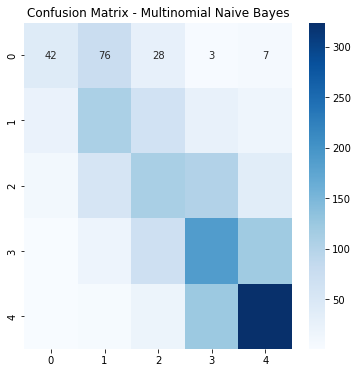

In [11]:
cf_mnb = confusion_matrix(y_test,pred_test_nb1)
plt.figure(figsize = (6,6))
plt.title('Confusion Matrix - Multinomial Naive Bayes')
sns.heatmap(cf_mnb,annot=True,cmap='Blues',fmt='g')

### Exportar Pipeline

In [12]:
pipe_route = "pipeline.joblib"
dump(pipe_nb1,pipe_route)

['pipeline.joblib']

In [13]:
pipe_route2 = "pipeline.pkl"
with open(pipe_route2,'wb') as file:
  pkl.dump(pipe_nb1,file)